<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/04Apr20_3_computational_sample_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Statistics through Resampling

### Introduction

Now in the last lesson, we discussed how to calculate sample statistics as well as the accuracy of such statistics (via the standard error) through a formulaic approach.  That is, to calculate the standard error, we simply used our formula of:

$se = \frac{S}{\sqrt{n}} $

In this lesson, we'll see how we can make certain calculations without this fancy formula above but through resampling.

### Loading our Sample

Once again let's load up our sample data on NBA players.

In [0]:
import pandas as pd
url = "gs://curriculum-assets/mod-2/players_sample.csv"
players_df = pd.read_csv(url, index_col = 0)

In [0]:
players_df.shape

(150, 29)

Now we saw that we can calculate the mean and it's standard error by using the following formulas:

*  $\hat{x} = \frac{1}{n}\sum_{i=1}^n x_i $

* $se = \frac{S}{\sqrt{n}} $

Now remember what the standard error says.  The standard error is the average deviation in the mean that we would see, if we were to draw the sample mean many times.  The formula above shows that this depends on the size of our sample and our population's standard deviation (estimated by the sample standard deviation).

### Compute Sample Statistics

Now with the standard error formulation above, we are saying what would happen if we were to take many random samples.  Of course, we never do, take 1000 random samples of a single population because doing so is too expensive.

But with a computer, we can *simulate* the drawing of many random samples.

It's not so hard.

To do so we:
1. Start with our sample of our population, which we have above.

In [0]:
players_df.shape

(150, 29)

2. Then we pretend that *this sample is our underlying population*, and we randomly draw samples from it.

For example, let's make 1000 simple random sampes from our `players_df` sample.

In [0]:
import numpy as np
from numpy.random import seed

seed(2)
samples = []
n = 150
for idx in range(1000):
    idcs = players_df.index
    rand_idcs = np.random.choice(idcs, size=n)
    sample = players_df.loc[rand_idcs]
    samples.append(sample)

What we can see is that we just created 1000 different random samples, and stored them in the array sample.

In [0]:
sample_num = 0
# change the sample num above to see the different random samples
samples[sample_num][:3]

,player_id,name,weight,birth_date,height,nationality,team_abbreviation,most_recent_season,box_plus_minus,games_played,...,total_rebounds,turnovers,position,points,three_pointers,free_throw_percentage,assists,three_point_attempts,steals,blocks
404,ferreyo01,Yogi Ferrell,180,1993-05-09,72,United States of America,SAC,2019.0,-1.4,243.0,...,48.0,25.0,PG,185.0,19.0,0.865,59.0,69.0,14.0,4.0
203,theisda01,Daniel Theis,215,1992-04-04,80,Germany,BOS,2019.0,1.1,187.0,...,380.0,48.0,C,539.0,26.0,0.764,95.0,81.0,35.0,75.0
334,paulch01,Chris Paul,175,1985-05-06,73,United States of America,OKC,2019.0,7.6,1013.0,...,310.0,137.0,PG,1114.0,101.0,0.900,426.0,279.0,98.0,9.0


And now from these samples we can calculate the mean, by first taking the mean of each sample, and then the mean of the means.

In [0]:
sample_means = np.array([sample['height'].mean() for sample in samples])
sample_means[:3]

array([78.52      , 78.24666667, 78.67333333])

In [0]:
sample_means.mean()

78.52758

Now let's think about this, if we have a thousand different sample means.  And the standard error is simply the average deviation in the mean.  Then we can compute the standard error by computing the standard deviation in our sampling means.

In [0]:
sample_means.std()

0.2803815044621246

This is our standard error.

Let's compare this with the answer from the analytic approach.

* $se = \frac{S}{\sqrt{n}} $

In [0]:
players_df['height'].shape

(150,)

In [0]:
players_df['height'].std(ddof = 1)/np.sqrt(150)

0.27606481530983035

So, we would say that on average, we expect our sample mean to be off by .27.  And we can summarize this as:

> * $\hat{x} = 78.52 \pm .27$

Finally, let's compare this with our what we see in our actual underlying population.

In [0]:
import pandas as pd
players_df = pd.read_csv('./nba_combined.csv', index_col = 0)
players_df.shape

(496, 29)

In [0]:
players_df['height'].mean()

78.4375

In [0]:
78.4375 - 78.52

-0.08249999999999602

So we were off by $.08$.  Not bad.

### Summary

### Central Limit Theorem

In [0]:
games_played_cleaned = df.games_played.dropna()

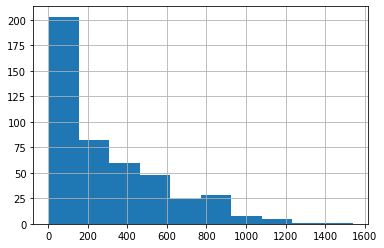

In [0]:
games_played_cleaned.hist()

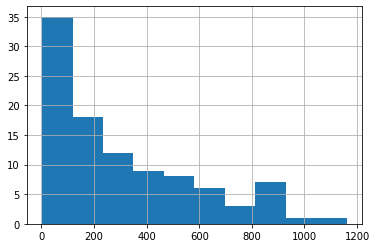

In [0]:
sample_played.hist()

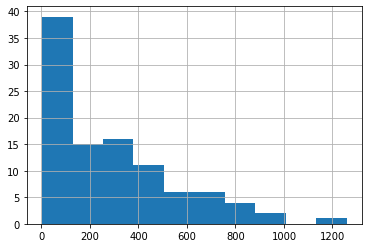

In [0]:
sample_played = make_sample(games_played_cleaned)
sample_played.hist()

In [0]:
sample_means_game_played = compute_sampling_distribution(games_played_cleaned, n=100, iters=1000)

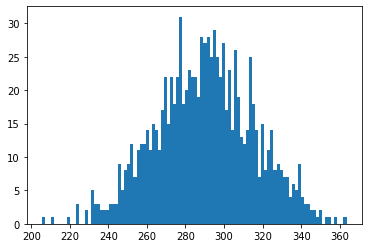

In [0]:
import matplotlib.pyplot as plt

plt.hist(sample_means_game_played, bins = 100)
plt.show()

In [0]:
def make_sample(col, n=100):
    idcs = col.index
    rand_idcs = np.random.choice(idcs, size=n, replace=False)
    sample = col[rand_idcs]
    return sample

In [0]:
sample_played = make_sample(games_played_cleaned)

### Resources

[Sports Reference](https://sportsreference.readthedocs.io/en/stable/)

[Degrees of Freedom](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics)